<a href="https://colab.research.google.com/github/jeromepatel/tsf-internship-task/blob/master/TSF_Internship_Task_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The Spark Foundation internship task allows students to experiment with data, develop new skills along the way. Aim of this task is to perform exploratory data analysis on the given superstore dataset.

The dataset contains 13 different features including categorical and numerical values, having various information on super store sales.

In [1]:
#imports 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

#basics
import numpy as np 
import pandas as pd 
#plots and other utilities
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#pd.set_option('max_columns',100)
import plotly.express as ex

import plotly.graph_objs as go
# import plotly.offline as pyo
from plotly.subplots import make_subplots
# pyo.init_notebook_mode()
from pandas.plotting import parallel_coordinates
import pandas_profiling
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(17,13))

In [2]:
data = pd.read_csv('/content/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Taking a look at data using automated exploratory data analysis 

In [3]:
!pip install sweetviz

In [5]:
#analyzing data using sweetviz (automated EDA)
import sweetviz as sv
data_report = sv.analyze(data)
data_report.show_html('Analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



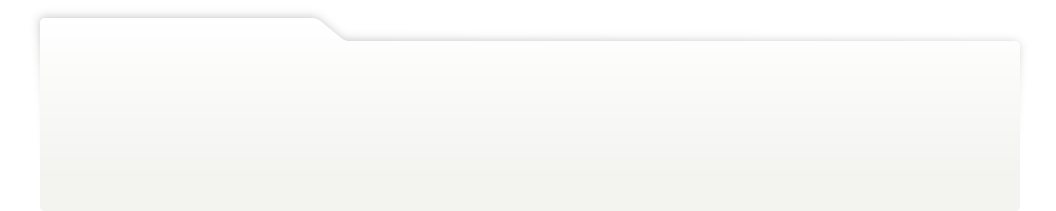
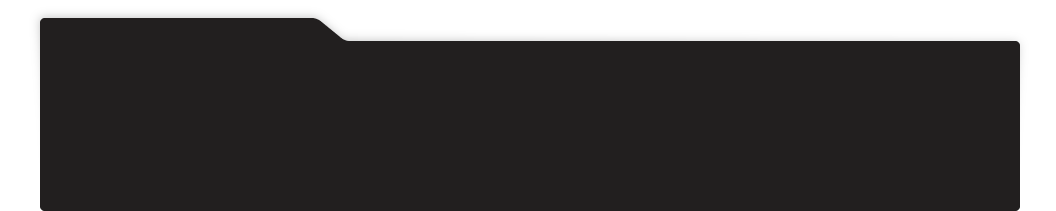
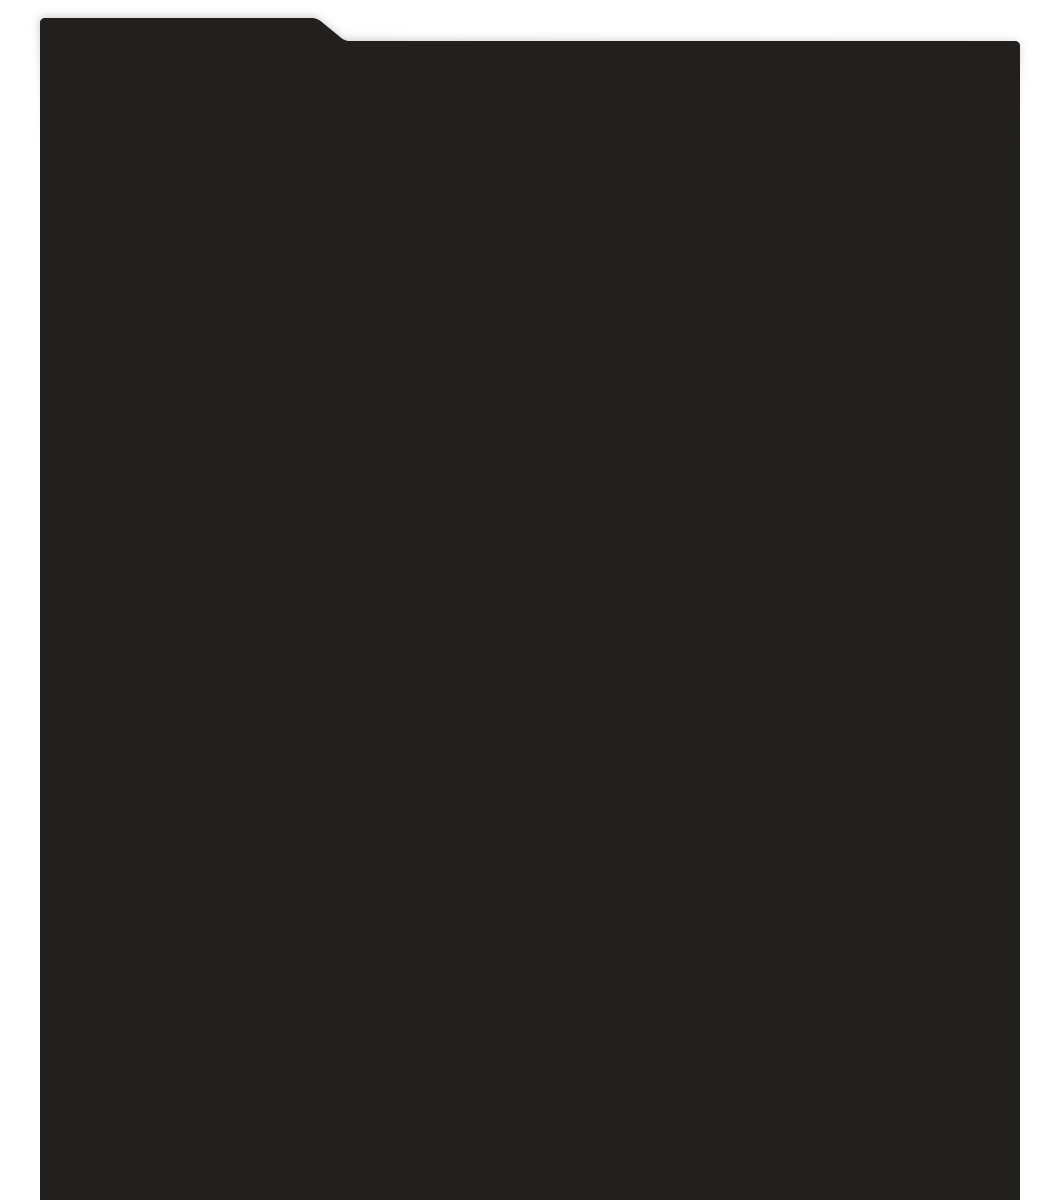
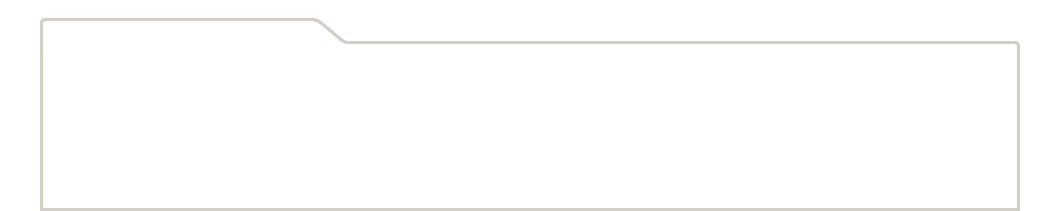
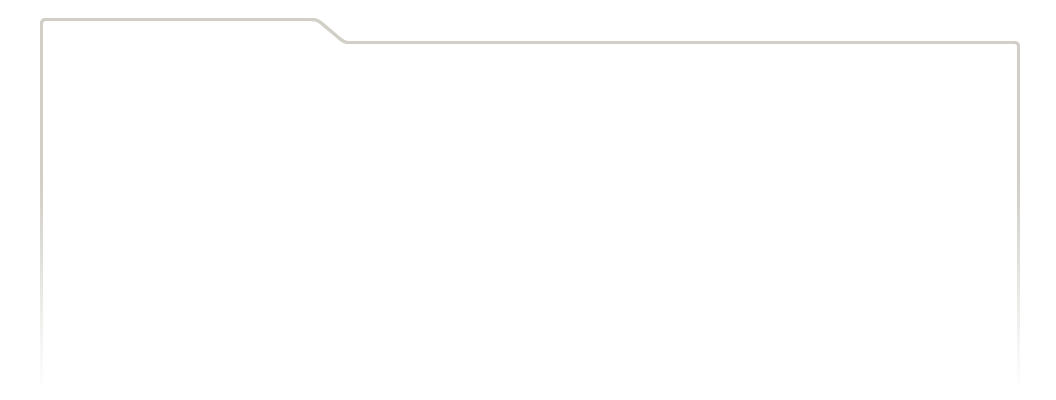
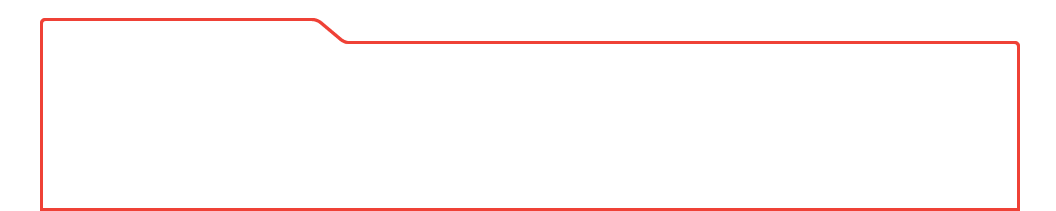
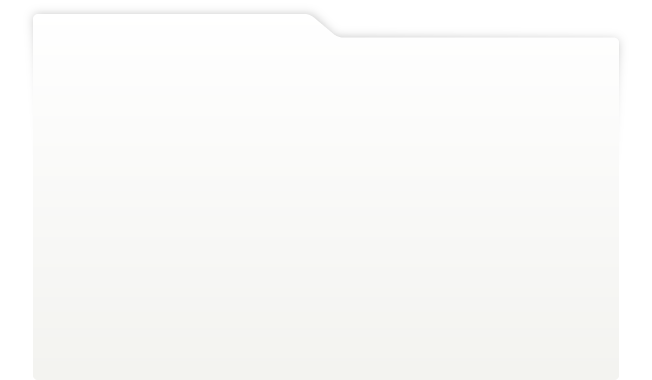
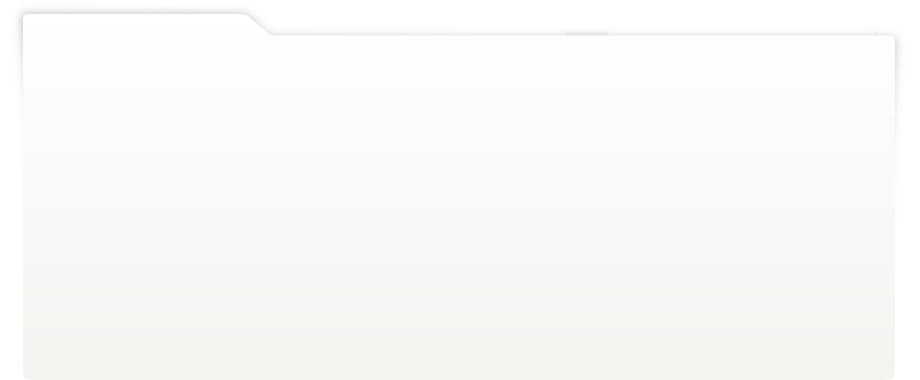
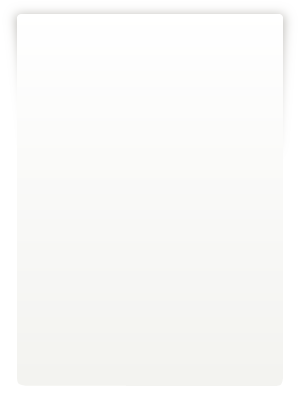
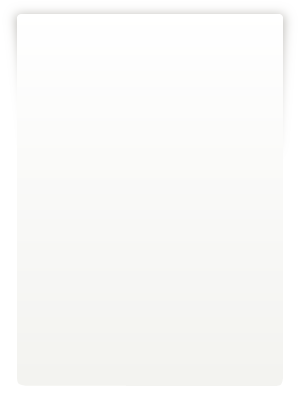
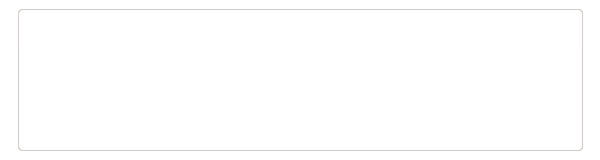
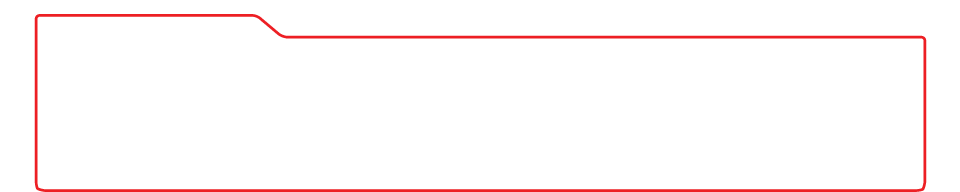
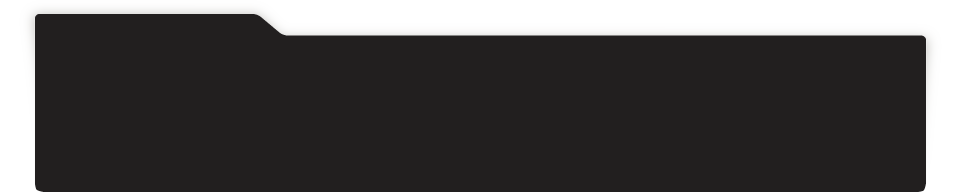
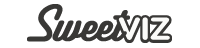
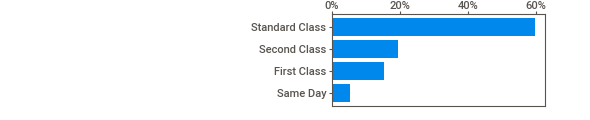
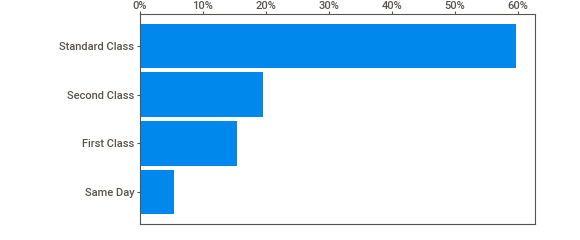
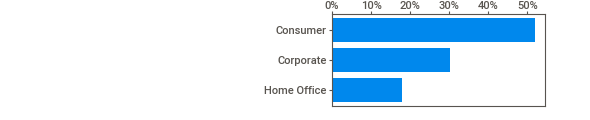
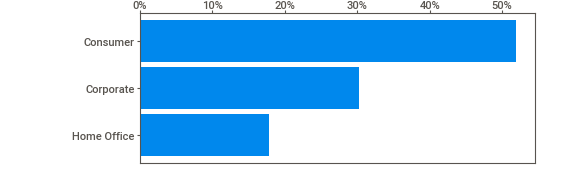
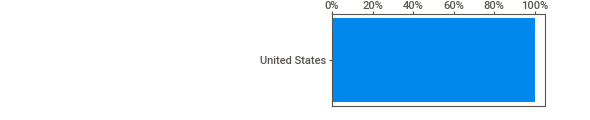
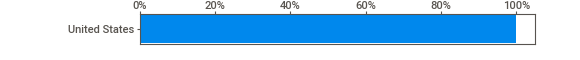
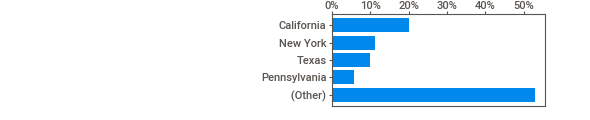
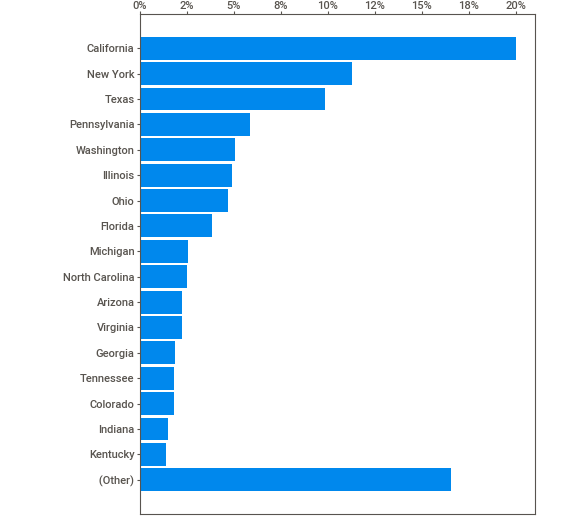
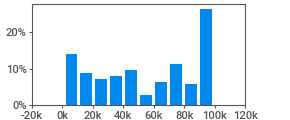
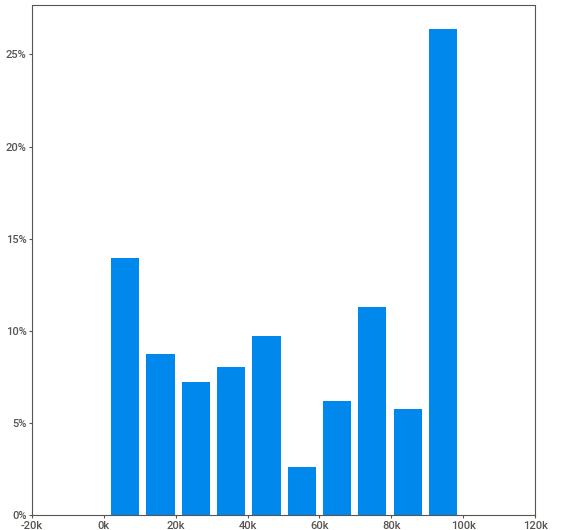
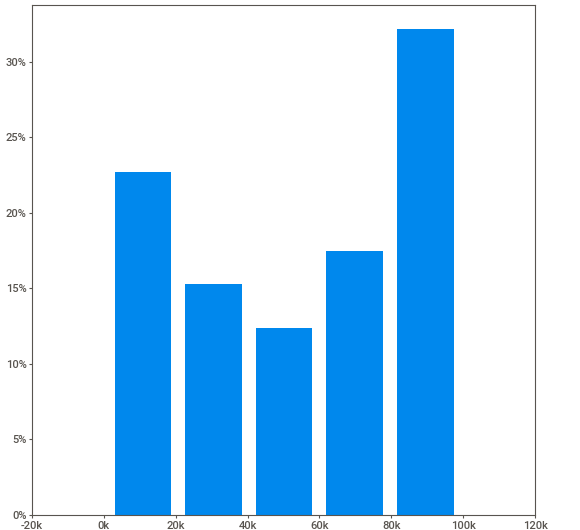
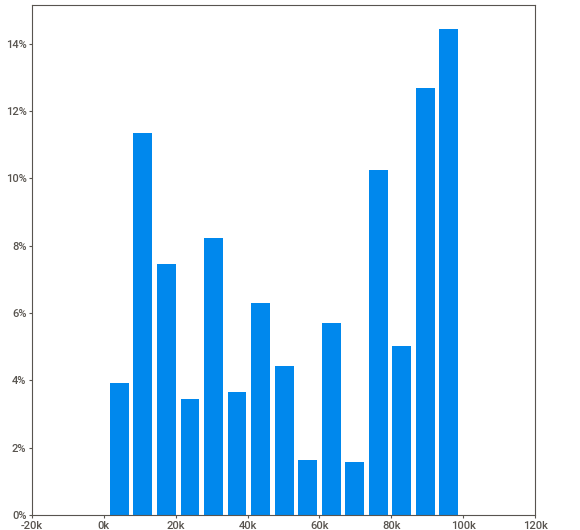
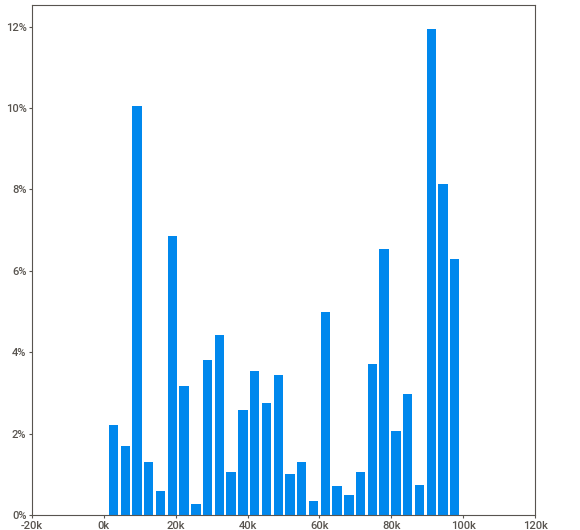
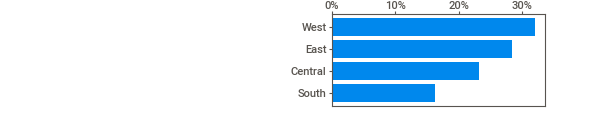
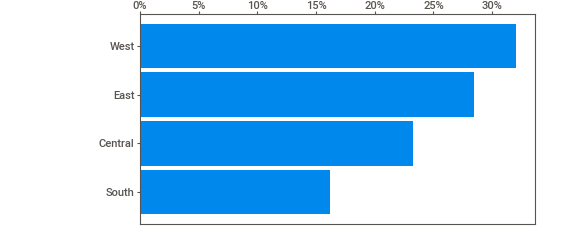
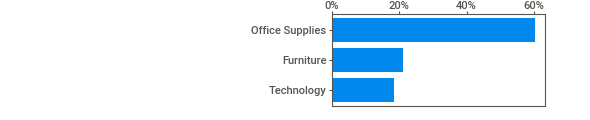
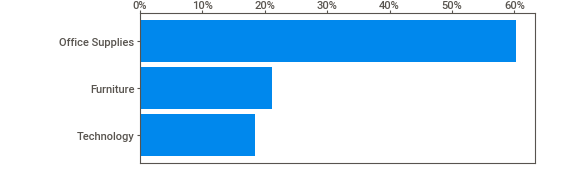
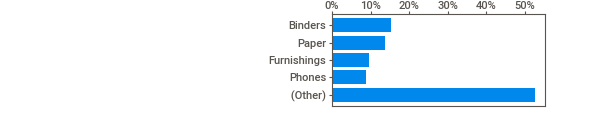
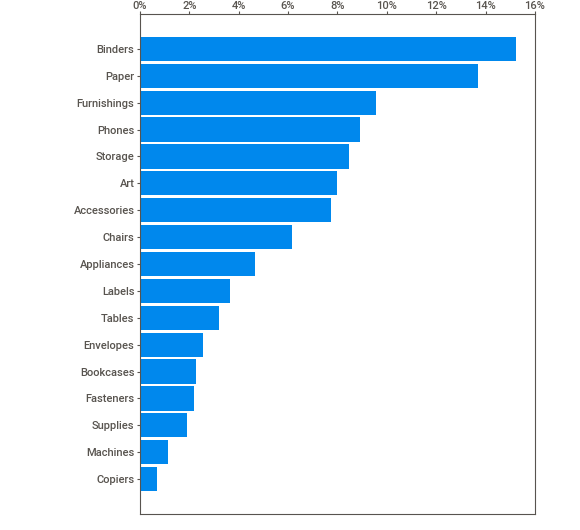
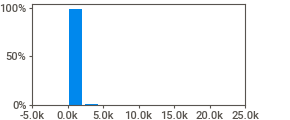
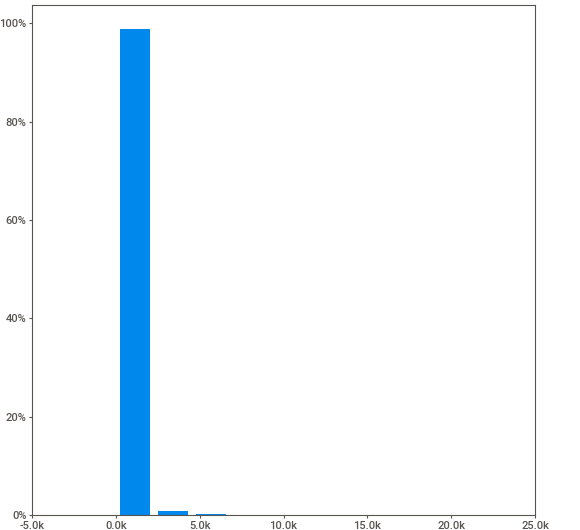
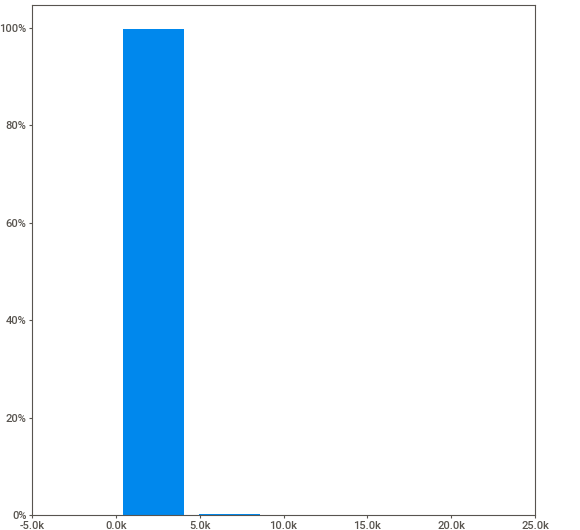
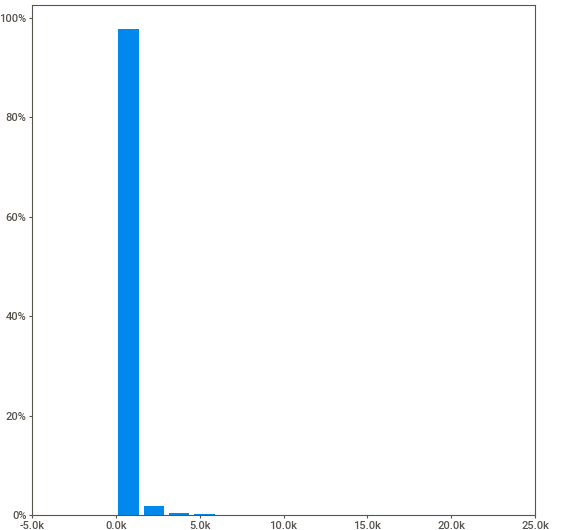
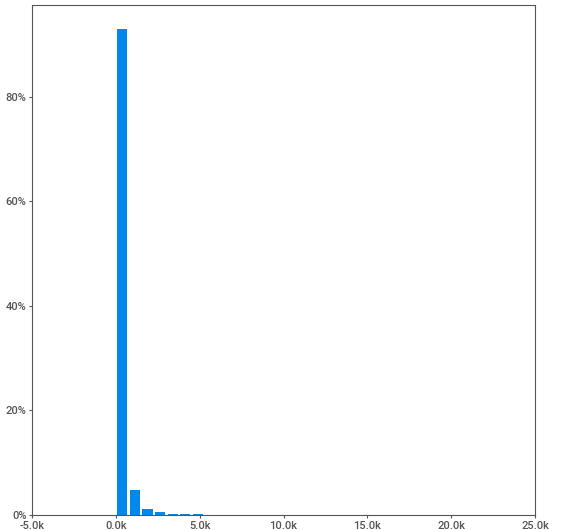
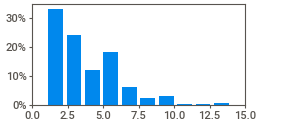
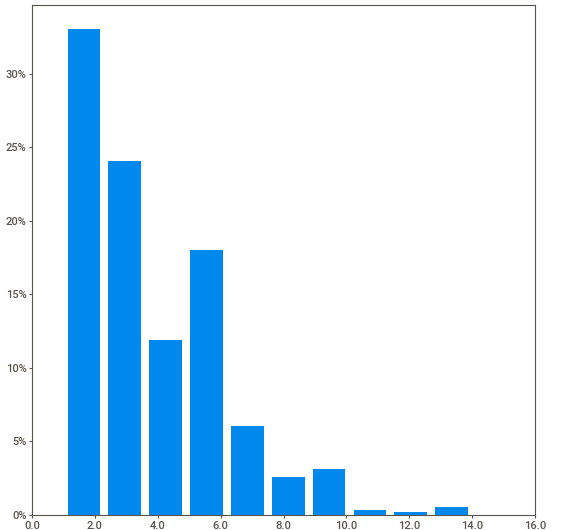
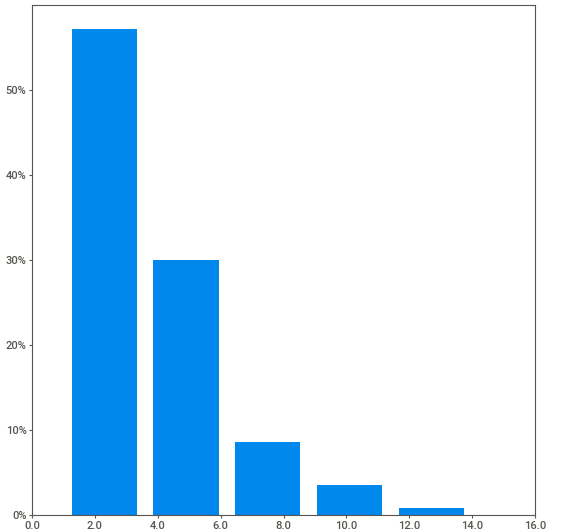
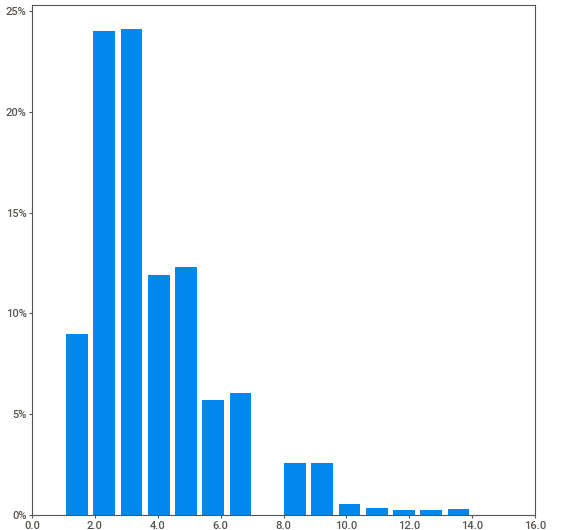
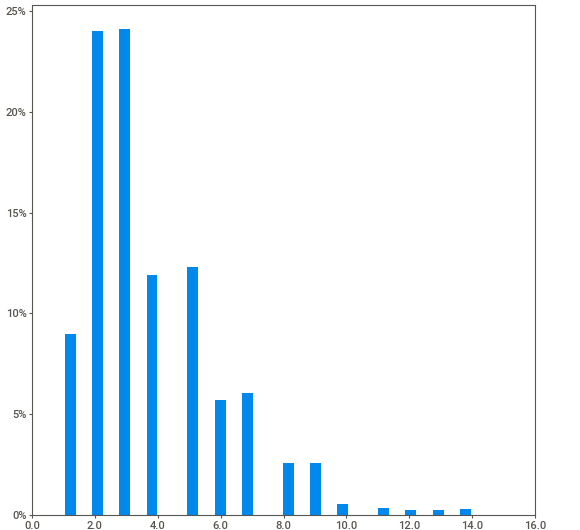
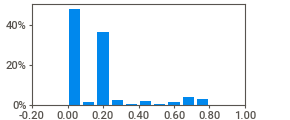
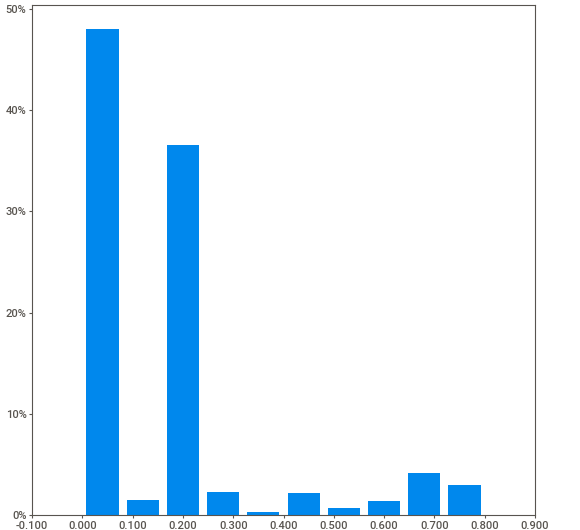
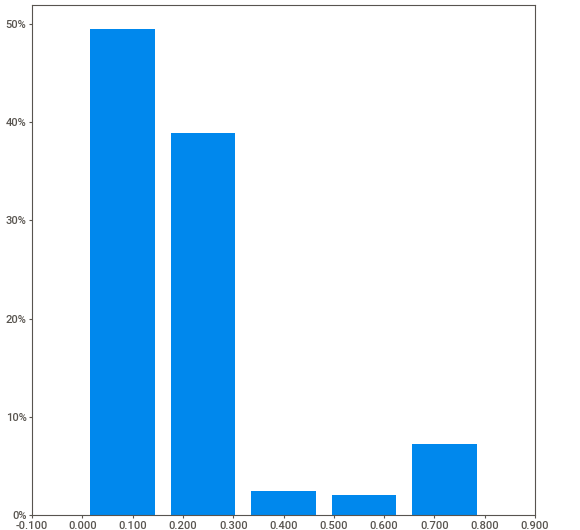
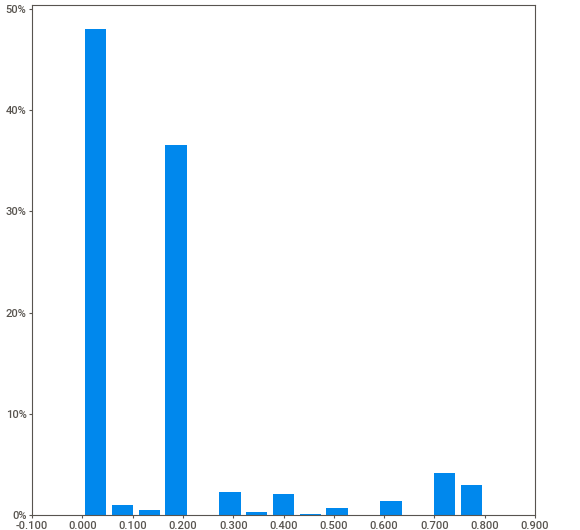
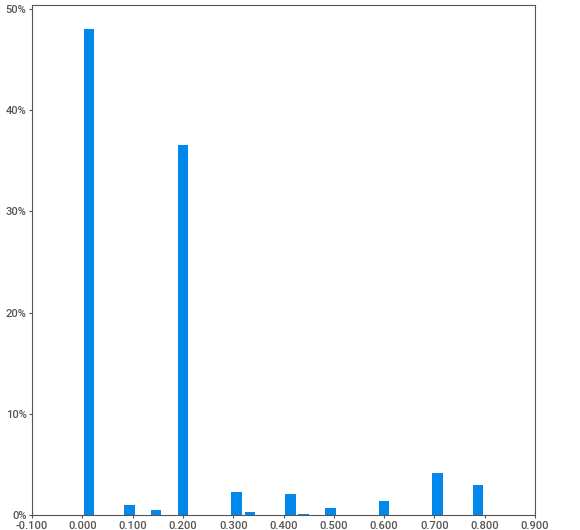
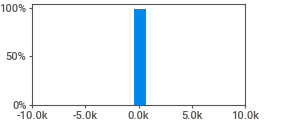
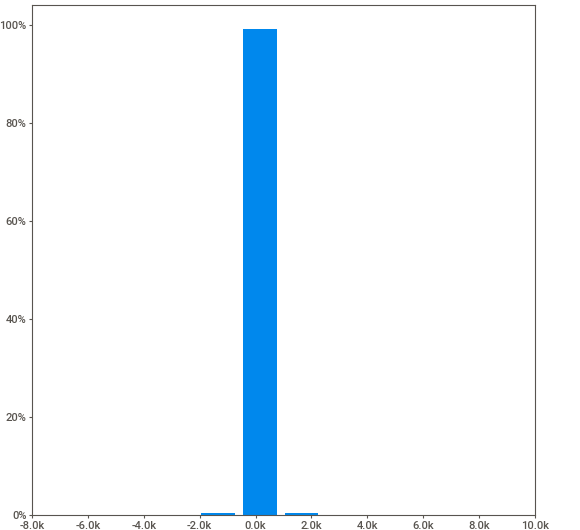
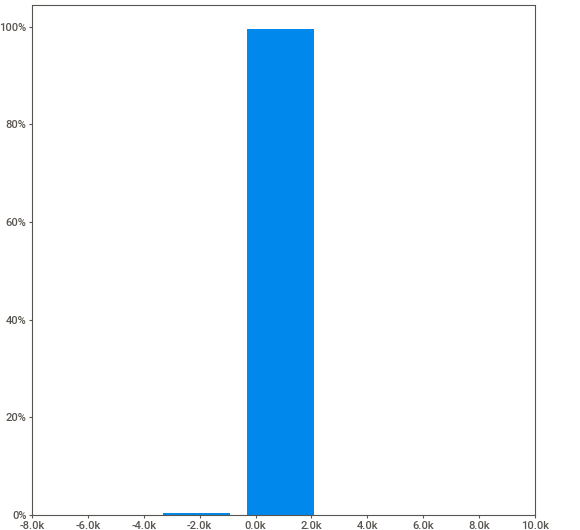
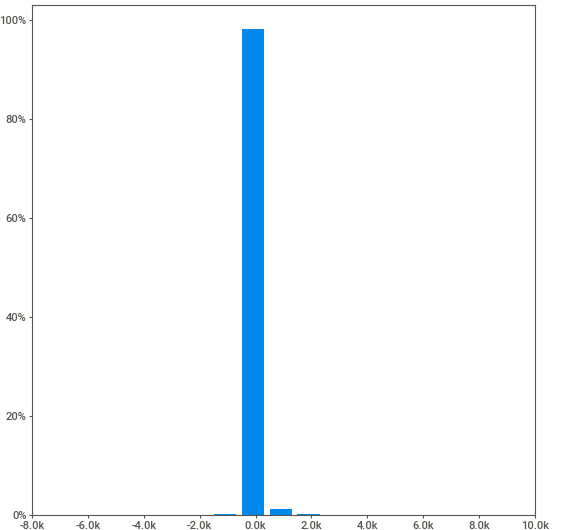
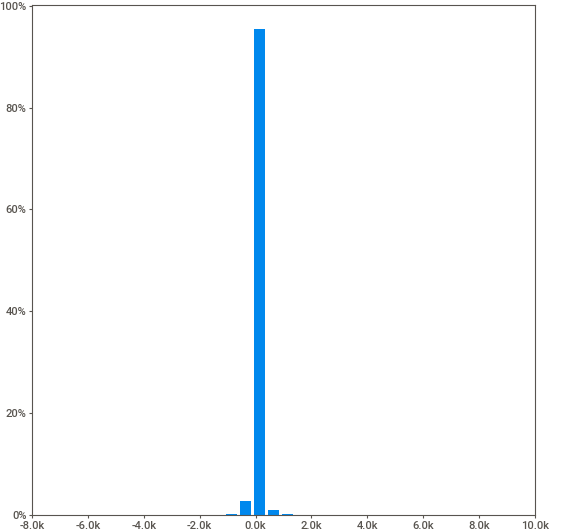
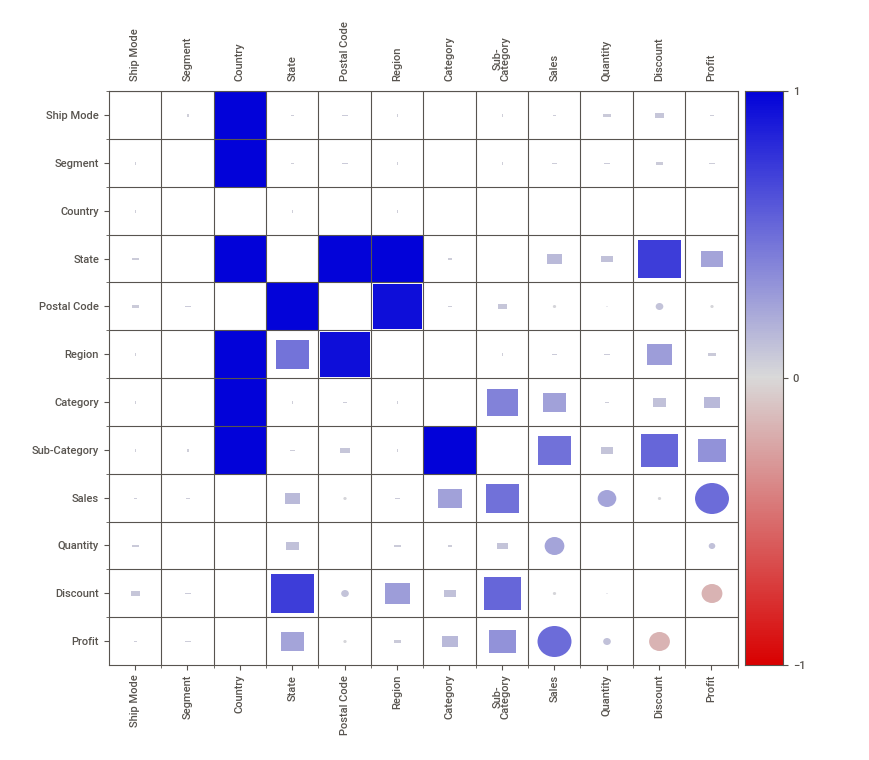
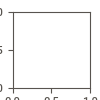

In [6]:
#displaying data
import IPython
IPython.display.HTML(filename="/content/Analysis.html")

## Numerical Features Distribuiton with Categorized Data

In [32]:
#numerical Values distribution

fig =   ex.histogram(data.loc[data.Quantity < 10],x='Quantity',title="Quantity Distribution Among Category",color = 'Category')
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.8)))
# Here we modify the layout
fig.update_layout(
                #  title='Age Distribution Among Gender',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )
fig.show()

In [33]:

fig =   ex.histogram(data,x='Discount',title="Discount Distribution Among Category",color = 'Category')
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.8)))
# Here we modify the layout
fig.update_layout(
                #  title='Age Distribution Among Gender',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )
fig.show()

## Categorical Features Distribution

In [8]:
colors = [' ', 'mediumturquoise', 'red', 'lightgreen']

labels = data.Category.value_counts().index
values = data.Category.value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])

fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=3)))

# Here we modify the layout
fig.update_layout(
                 title='Category count proportions',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )

fig.show()

In [17]:
colors = ['mediumturquoise', 'red', 'lightgreen']

labels = data.Segment.value_counts().index
values = data.Segment.value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])

fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=3)))

# Here we modify the layout
fig.update_layout(
                 title='Segment Count Proportions',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )

fig.show()

In [14]:
colors = [' ', 'mediumturquoise', 'red', 'lightgreen']

labels = data[['Ship Mode']].value_counts().index
values = data[['Ship Mode']].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])

fig.update_traces(marker=dict(colors = colors, line=dict(color='#000000', width=3)))

# Here we modify the layout
fig.update_layout(
                 title='Ship Mode Count',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )

fig.show()

In [19]:
fig =   ex.histogram(data,x='State',color = 'Ship Mode')
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.8)))
# Here we modify the layout
fig.update_layout(
                 title='Ship Mode Distribution Among States',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )
fig.show()

In [21]:
fig =   ex.histogram(data,x='State',color = 'Segment')
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.8)))
# Here we modify the layout
fig.update_layout(
                 title='State Distribution Among Segment',
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                 )
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Ship Mode'].unique(),
    y=data.query("Segment == 'Consumer'").groupby('Ship Mode').count()['Segment'],
    name='Segment Consumer',
    marker_color='mediumturquoise'
))
fig.add_trace(go.Bar(
    x=data['Ship Mode'].unique(),
    y=data.query("Segment == 'Home Office'").groupby('Ship Mode').count()['Segment'],
    name='Segment Home Office',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=data['Ship Mode'].unique(),
    y=data.query("Segment == 'Corporate'").groupby('Ship Mode').count()['Segment'],
    name='Segment Corporate',
    marker_color='lightgreen'
))

# Here we modify the layout
fig.update_layout(barmode='group',
                 title='Ship Mode Among Segment Classes',
                #xaxis_tickfont_size=14,
                yaxis=dict(
                    title='Ship Mode Count',
                    titlefont_size=16,
                    tickfont_size=14,
                ),
                  xaxis=dict(
                    title='Ship Modes',
                    titlefont_size=16,
                    tickfont_size=14,
                ),
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(50, 200, 100, 0.3)',
                    bordercolor='rgba(255, 255, 255, 0.6)'
                ),
                bargap=0.15, # gap between bars of adjacent location coordinates.
                bargroupgap=0. # gap between bars of the same location coordinate.
                 )
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.8)))
fig.show()

# Conclusions:

From the above EDA, we can derived some interesting conclusion for some of the features:
* Even though discount feature seems numerical, it is categorical in reality.
* The states take a lot of categorical values but we can ignore smaller proportion values those don't contribute much.
* Cities feature contain large number of even proportion values, which may increase the complexity of model.
* Office supplies in category class takes more than 60% of entries.
* Standard class is major portion in Ship Mode feature.
* Consumer is accounted for more than half values in segment feature.

These conclusions may contribute signicantly in feature engineering when training a model on this data. The large categorical class can be binned or probably reduced to few classes in order to make better predictions for the data.

## Code by: Jyot Makadiya
## GitHub: [jeromepatel](https://github.com/jeromepatel)
## Portfolio: [Jyot Makadiya](https://jeromepatel.github.io/)